In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
vocab = {}
map = {}

In [3]:
df_coord = pd.read_excel("map.xlsx", sheet_name=0).dropna()
df_coord

,要素编号,X坐标（单位：km）,Y坐标（单位：km）
0,D1,121.0,8.0
1,D2,193.0,137.0
3,Z01,205.0,92.0
4,Z02,159.0,62.0
5,Z03,143.0,38.0
...,...,...,...
128,J58,178.0,33.0
129,J59,196.0,39.0
130,J60,226.0,43.0
131,J61,160.0,18.0


In [4]:
# generate vocab and load map
index = 1
for row_name, item in df_coord.iterrows():
    vocab[item[0]]=index
    map[index]=(item[1],item[2])
    index += 1
vocab, map

({'D1': 1,
  'D2': 2,
  'Z01': 3,
  'Z02': 4,
  'Z03': 5,
  'Z04': 6,
  'Z05': 7,
  'Z06': 8,
  'F01': 9,
  'F02': 10,
  'F03': 11,
  'F04': 12,
  'F05': 13,
  'F06': 14,
  'F07': 15,
  'F08': 16,
  'F09': 17,
  'F10': 18,
  'F11': 19,
  'F12': 20,
  'F13': 21,
  'F14': 22,
  'F15': 23,
  'F16': 24,
  'F17': 25,
  'F18': 26,
  'F19': 27,
  'F20': 28,
  'F21': 29,
  'F22': 30,
  'F23': 31,
  'F24': 32,
  'F25': 33,
  'F26': 34,
  'F27': 35,
  'F28': 36,
  'F29': 37,
  'F30': 38,
  'F31': 39,
  'F32': 40,
  'F33': 41,
  'F34': 42,
  'F35': 43,
  'F36': 44,
  'F37': 45,
  'F38': 46,
  'F39': 47,
  'F40': 48,
  'F41': 49,
  'F42': 50,
  'F43': 51,
  'F44': 52,
  'F45': 53,
  'F46': 54,
  'F47': 55,
  'F48': 56,
  'F49': 57,
  'F50': 58,
  'F51': 59,
  'F52': 60,
  'F53': 61,
  'F54': 62,
  'F55': 63,
  'F56': 64,
  'F57': 65,
  'F58': 66,
  'F59': 67,
  'F60': 68,
  'J01': 69,
  'J02': 70,
  'J03': 71,
  'J04': 72,
  'J05': 73,
  'J06': 74,
  'J07': 75,
  'J08': 76,
  'J09': 77,
  'J10': 7

In [5]:
df_adj = pd.read_excel("map.xlsx", sheet_name=1)
df_adj

,要素编号1,要素编号2
0,D1,Z03
1,D1,J11
2,D1,J10
3,D1,J09
4,D2,J02
...,...,...
345,J61,Z03
346,J62,J60
347,J62,F60
348,J62,F59


In [6]:
matrix = np.zeros([2+6+60+62, 2+6+60+62])
matrix.shape

(130, 130)

In [7]:
# generate and evaluate adjacency matrix
for row_name, item in df_adj.iterrows():
    matrix[vocab[item[0]]-1][vocab[item[1]]-1] += 1
eval = matrix.T - matrix
if sum(sum(eval)) == 0:
    print("The adjacency matrix is correct")

The adjacency matrix is correct


In [8]:
# get the upper triangle matrix of the matrix
matrix = np.triu(matrix)
matrix
sum(sum(matrix))

175.0

In [9]:
matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

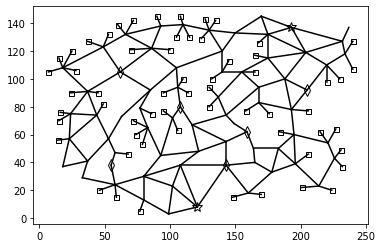

In [39]:
# draw map
plt.figure('MSAP')
ax = plt.gca()
for i in range(130):
    for j in range(130):
        if matrix[i, j] == 1:
            ax.plot([map[i+1][0], map[j+1][0]],[map[i+1][1], map[j+1][1]], color='black', markersize=3, markerfacecolor='none')
for i in range(2):
    ax.plot(map[i+1][0], map[i+1][1], color='black', marker='*', markersize=10, markerfacecolor='none')
for i in range(2, 8):
    ax.plot(map[i+1][0], map[i+1][1], color='black', marker='d', markersize=8, markerfacecolor='none')
for i in range(8, 68):
    ax.plot(map[i+1][0], map[i+1][1], color='black', marker='s', markersize=5, markerfacecolor='none')